Context
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.



In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
df= pd.read_csv("Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


Data Cleaning. 
1.Handling missing values
2.handling duplicates
3.check data types
4.understanding dataset

In [5]:
df.isnull().sum() ##checking for missing values

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [6]:
##check all the categories

In [7]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [8]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [9]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [10]:
##handling the features name. combining female and fe male . replacing fe male with female

df['Gender']= df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus']= df['MaritalStatus'].replace('Single', 'Unmarried')

In [11]:
df['Gender'].value_counts()


Gender
Male      2916
Female    1972
Name: count, dtype: int64

##checking missing values
this can happen many way.
-randomly missing
-user might've not entered the values


In [12]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100,5), '% missing values' )

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [13]:
#statistics on numerical columns(null cols)
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [14]:
## the above data shows close mean and 50% data, which means there are very less outliers

Imputing NUll values
1. impute median value for age column
2. impute mode for type of contract
3. impute median for duration of pitch
4. impute mode for numberoffollowup as it is discrete feature
5. impute model for preferredpropertystar
6. impute median for numberoftrips
7. impute mode for numberofchildrenvisiting
8. impute median for monthlyincome

impute means to fill in or replace missing data with substituted values. 

In [15]:
#Age
df.Age.fillna(df.Age.median(), inplace=True)

#TypeofContact
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

#DurationOfPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

#NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

#PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

#NumberOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

#NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

#MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

In [16]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [17]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [18]:
##customerID is not required for now
df.drop('CustomerID', inplace=True, axis=1)

In [19]:
df.head(
    
)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


Feature Engineering
Feature Extraction

In [20]:
#creating new columns for feature

df['TotalVisiting']= df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], inplace=True, axis=1 )

In [21]:
#getting all the numeric feature
num_features = [feature for feature in df.columns if df[feature].dtype!= 'O']
print('Num of numerical features:' , len(num_features))

Num of numerical features: 12


In [22]:
##categorical features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of categorical features:', len(cat_features))

Num of categorical features: 6


In [23]:
##discrete features
##such as pincodes, which will be in 20 categories
discrete_features = [feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of discrete features:', len(discrete_features))

Num of discrete features: 9


In [24]:
##Continuous features
cat_features = [feature for feature in num_features if feature not in discrete_features]
print('Num of categorical features:', len(cat_features))

Num of categorical features: 3


## Model Training

In [25]:
from sklearn.model_selection import train_test_split
X= df.drop(['ProdTaken'], axis=1)
y= df['ProdTaken']

In [26]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [27]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [28]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [30]:
##we are gonna see the object type data in category features
#create column Transformer with 3 types of transformers
#Suppose you have a dataset of animals with a "Species" column containing values like "Cat", "Dog", 
# and "Parrot". One-hot encoding would transform this into three separate columns: "Species_Cat",
#  "Species_Dog", and "Species_Parrot", each containing 0 or 1
#one hot is exclusively used for category only.
#standard is used for numeric
#we cannot use one hot encoding we=hen multiple rows are there. ex: if 120 rows exist, it make table of 120x120 table.
#using labelEncoder is better as it creates only 1 column of 120 rows and assign unique number for everything

cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer= OneHotEncoder(drop='first')


##column transformer consist multiple transformation techniques.
##we are including onehot and standard inside this. 

preprocessor = ColumnTransformer([
    ("OneHotEncoder", oh_transformer, cat_features),
    ("StandardScaler", numeric_transformer, num_features)
])

In [31]:
X_train = preprocessor.fit_transform(X_train) ##changing them to arrays

In [32]:
X_train ##all got changed to arrays

array([[ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.38224537, -0.77415132],
       [ 1.        ,  0.        ,  1.        , ...,  0.78296635,
        -0.4597992 ,  0.64361526],
       [ 1.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.24519557, -0.06526803],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.36057591,  0.64361526],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.25279888,  0.64361526],
       [ 0.        ,  0.        ,  1.        , ..., -1.2771941 ,
        -1.08251091, -1.48303461]])

In [33]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.653841,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.455047,-0.898180,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,1.545210,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,1.789549,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,0.643615


In [34]:
##apply transformation on test(transform) so there wont be any leakage and wont know test data
X_test= preprocessor.transform(X_test)

In [35]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

## Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [37]:
# Importing all necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier


# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i] ##getting  RandomForestClassifier()
    model.fit(X_train, y_train)

    ##predicting
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1= f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision= precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score= roc_auc_score(y_train, y_train_pred)

    ## Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)


    print(list(models.keys())[i])

    # Training set performance print statements
    print("Training Set Performance:")
    print(f"Accuracy: {model_train_accuracy:.4f}")
    print(f"F1 Score: {model_train_f1:.4f}")
    print(f"Precision: {model_train_precision:.4f}")
    print(f"Recall: {model_train_recall:.4f}")
    print(f"ROC AUC Score: {model_train_rocauc_score:.4f}")

    print("---------------------------")

    # Test set performance print statements
    print("\nTest Set Performance:")
    print(f"Accuracy: {model_test_accuracy:.4f}")
    print(f"F1 Score: {model_test_f1:.4f}")
    print(f"Precision: {model_test_precision:.4f}")
    print(f"Recall: {model_test_recall:.4f}")
    print(f"ROC AUC Score: {model_test_rocauc_score:.4f}")


    print("=====================================")

Logistic Regression
Training Set Performance:
Accuracy: 0.8460
F1 Score: 0.8202
Precision: 0.7016
Recall: 0.3032
ROC AUC Score: 0.6368
---------------------------

Test Set Performance:
Accuracy: 0.8364
F1 Score: 0.8087
Precision: 0.6914
Recall: 0.2932
ROC AUC Score: 0.6307
K-Nearest Neighbors
Training Set Performance:
Accuracy: 0.9471
F1 Score: 0.9448
Precision: 0.9439
Recall: 0.7613
ROC AUC Score: 0.8755
---------------------------

Test Set Performance:
Accuracy: 0.8875
F1 Score: 0.8784
Precision: 0.8189
Recall: 0.5445
ROC AUC Score: 0.7576
Support Vector Machine
Training Set Performance:
Accuracy: 0.9013
F1 Score: 0.8899
Precision: 0.9173
Recall: 0.5171
ROC AUC Score: 0.7532
---------------------------

Test Set Performance:
Accuracy: 0.8650
F1 Score: 0.8434
Precision: 0.8471
Recall: 0.3770
ROC AUC Score: 0.6802
Naive Bayes
Training Set Performance:
Accuracy: 0.7066
F1 Score: 0.7356
Precision: 0.3509
Recall: 0.6749
ROC AUC Score: 0.6944
---------------------------

Test Set Perform

Typical Workflow:

	1.	Step 1: Train the model with default hyperparameters (baseline model).
	2.	Step 2: Evaluate its performance (accuracy, F1 score, etc.).
	3.	Step 3: Hyperparameter tuning (GridSearchCV, RandomizedSearchCV, etc.) to find the best parameter combination.
	4.	Step 4: Train the model again with the optimized hyperparameters.
	5.	Step 5: Evaluate the improved model on test data.

In [46]:
##Hyper parameter training


rf_params={
    "max_depth": [5,8,15,None, 10],
    "max_features": [5,7,"auto", 8],
    "min_samples_split": [2,8,15,20],
    "n_estimators": [100,200,500,1000]
}
ada_params={
    "n_estimators":[50,60,70,80,90],
    "algorithm":['SAMME','SAMME.R']
}

In [48]:
##models list for hyperparameter tuning

randomcv_models = [
    ("RF", RandomForestClassifier(), rf_params),
     ("AB", AdaBoostClassifier(), ada_params)
]

In [49]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('AB',
  AdaBoostClassifier(),
  {'n_estimators': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']})]

In [50]:
from sklearn.model_selection import RandomizedSearchCV

model_param={}

for name, model, params in randomcv_models:
    random= RandomizedSearchCV(estimator= model,
    param_distributions = params,
    n_iter=100,
    cv=3,
    verbose=2,
    n_jobs=-1)

    random.fit(X_train, y_train)
    model_param[name]= random.best_params_

for model_name in model_param:
    print(f"-------Best Params for {model_name}---------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=8, max_features=5, min_samples_split=15, n_estimators=200; total time=   0.3s
[CV] END max_depth=8, max_features=5, min_samples_split=15, n_estimators=200; total time=   0.4s
[CV] END max_depth=8, max_features=5, min_samples_split=15, n_estimators=200; total time=   0.4s
[CV] END max_depth=15, max_features=8, min_samples_split=15, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=500; total time=   1.1s
[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=500; total time=   1.2s
[CV] END max_depth=8, max_features=5, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, max_features=8, min_samples_split=15, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_sp

/Users/sriramsohan/Documents/projects/testing_models/pipeline_inf_env/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/sriramsohan/Documents/projects/testing_models/pipeline_inf_env/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/sriramsohan/Documents/projects/testing_models/pipeline_inf_env/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/sriramsohan/Documents/projects/testing_models/pipeline_inf_env/lib/python3.10/site-p

[CV] END ...................algorithm=SAMME, n_estimators=80; total time=   0.2s
[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   0.1s
[CV] END ...................algorithm=SAMME, n_estimators=80; total time=   0.2s
[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   0.1s
[CV] END ...................algorithm=SAMME, n_estimators=90; total time=   0.2s[CV] END ...................algorithm=SAMME, n_estimators=90; total time=   0.2s

[CV] END ...................algorithm=SAMME, n_estimators=80; total time=   0.2s
[CV] END ...................algorithm=SAMME, n_estimators=90; total time=   0.2s
[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   0.1s
[CV] END .................algorithm=SAMME.R, n_estimators=60; total time=   0.1s
[CV] END .................algorithm=SAMME.R, n_estimators=60; total time=   0.1s
[CV] END .................algorithm=SAMME.R, n_estimators=60; total time=   0.1s
[CV] END .................al

In [51]:
##we've got the best parameter. now update this in randomforest classifier



# Dictionary of models
models = {
    
    "Random Forest": RandomForestClassifier(n_estimators=1000, min_samples_split=2, max_features=8, max_depth=15),
    "Ada Boost": AdaBoostClassifier(n_estimators=80, algorithm='SAMME')

}

for i in range(len(list(models))):
    model = list(models.values())[i] ##getting  RandomForestClassifier()
    model.fit(X_train, y_train)

    ##predicting
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1= f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision= precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score= roc_auc_score(y_train, y_train_pred)

    ## Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)


    print(list(models.keys())[i])

    # Training set performance print statements
    print("Training Set Performance:")
    print(f"Accuracy: {model_train_accuracy:.4f}")
    print(f"F1 Score: {model_train_f1:.4f}")
    print(f"Precision: {model_train_precision:.4f}")
    print(f"Recall: {model_train_recall:.4f}")
    print(f"ROC AUC Score: {model_train_rocauc_score:.4f}")

    print("---------------------------")

    # Test set performance print statements
    print("\nTest Set Performance:")
    print(f"Accuracy: {model_test_accuracy:.4f}")
    print(f"F1 Score: {model_test_f1:.4f}")
    print(f"Precision: {model_test_precision:.4f}")
    print(f"Recall: {model_test_recall:.4f}")
    print(f"ROC AUC Score: {model_test_rocauc_score:.4f}")


    print("=====================================")

Random Forest
Training Set Performance:
Accuracy: 0.9990
F1 Score: 0.9990
Precision: 1.0000
Recall: 0.9945
ROC AUC Score: 0.9973
---------------------------

Test Set Performance:
Accuracy: 0.9305
F1 Score: 0.9255
Precision: 0.9624
Recall: 0.6702
ROC AUC Score: 0.8319
Ada Boost
Training Set Performance:
Accuracy: 0.8465
F1 Score: 0.8132
Precision: 0.7699
Recall: 0.2524
ROC AUC Score: 0.6176
---------------------------

Test Set Performance:
Accuracy: 0.8364
F1 Score: 0.7977
Precision: 0.7818
Recall: 0.2251
ROC AUC Score: 0.6049


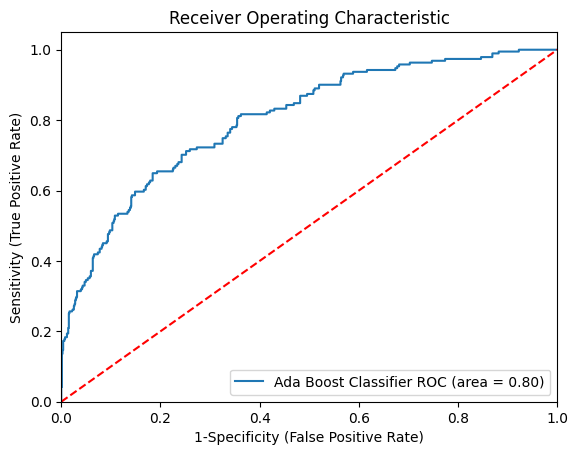

In [52]:
##plot roc auc curve

from sklearn.metrics import roc_auc_score, roc_curve, auc
plt.figure()


##add the models to the list that you want to view on roc plot

auc_models=[{
    'label': 'Ada Boost Classifier',
    'model': AdaBoostClassifier(n_estimators=80, algorithm='SAMME'),
    'auc': 0.6049
},
]

for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train) ##training the model
    ##Compute false positive rate,and true positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], roc_auc))

# Custom settings for the plot
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()

In [44]:
##nearly 98 percent of area is covered by randomforest

In [45]:
# From the ROC curve and its AUC (Area Under the Curve) value of 0.98, you are learning several key insights about the model’s performance in predicting whether a customer will purchase a package:

# Key Insights:

# 	1.	High Predictive Power:
# 	•	The AUC score of 0.98 indicates that the Random Forest model you trained has excellent discriminative ability. It means the model is highly capable of distinguishing between customers who are likely to purchase a package and those who are not.
# 	•	An AUC score closer to 1 (like 0.98) means near-perfect classification performance, where the True Positive Rate (Sensitivity) is very high, and the False Positive Rate is low.
# 	2.	Model Performance:
# 	•	The ROC curve (Receiver Operating Characteristic) shows how well the model performs at different thresholds. The steeper the curve toward the top-left corner, the better the model is at distinguishing between positive and negative classes.
# 	•	In your case, the curve rises sharply toward the top-left, indicating that the model correctly identifies most of the customers who are likely to purchase a package (high sensitivity) while keeping false positives (wrong classifications of non-purchasers as purchasers) low.
# 	3.	Reducing Marketing Costs:
# 	•	Given that the model can accurately predict potential customers for the new Wellness Tourism Package, the company can target marketing efforts more efficiently.
# 	•	Instead of contacting random customers (as done previously), you can now focus on the subset of customers that the model predicts as likely to purchase, optimizing marketing costs and maximizing returns.
# 	4.	Business Impact:
# 	•	With the model’s high accuracy in predicting who is likely to buy, the company can significantly reduce marketing waste.
# 	•	The business can also use this model for similar future products and tailor their strategies based on customer behavior to increase sales with minimal marketing expenditure.

# In Summary:

# The high AUC score and the ROC curve tell you that your model is performing exceptionally well. This means that by using the predictions from this model, the company can make more informed and data-driven decisions to reduce marketing costs while targeting the right customers for their Wellness Tourism Package. The insights derived from this model are critical for business expansion and operational efficiency.

# This is how professional data scientists and MLEs evaluate model performance to drive business outcomes.